In [10]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine
import datetime
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


# read csv files into Pandas DataFrame

# Create Pandas DataFrame for rdu-weather-history.csv obtained from https://catalog.data.gov/dataset/local-weather-archive

csv_weather = "rdu-weather-history.csv"
weather_data_df = pd.read_csv(csv_weather,sep=';')

# crash data obtained from https://data.world/townofcary/cpd-crash-incidents
csv_file = "cpd-crash-incidents.csv"
crash_data_df = pd.read_csv(csv_file,sep=';')

# making a new DataFrame by selecting limited columns from previous DataFrame
new_weather_data_df = weather_data_df [
 
['date',
 'precipitation',
 'snowfall',
 'snowdepth',
 'fog',
 'fogheavy',
 'mist',
 'rain',
 'fogground',
 'ice',
 'glaze',
 'drizzle',
 'snow',
 'freezingrain',
 'smokehaze',
 'hail',
 'blowingsnow',
 'dust',
 'freezingfog']
].copy()


# making a new DataFrame by selecting limited columns from previous DataFrame
new_crash_data_df = crash_data_df[
['tamainid',
 'Road_Feature',
 'Road_Character',
 'Road_Class',
 'Road_Configuration',
 'Road_Surface',
 'Road_Conditions',
 'Light_Condition',
 'Weather',
 'TA_Date',
 'Crash_Date']
 ].copy()
# new_crash_data_df.head()

# Change all column names to lower case
new_crash_data_df.columns = ['tamainid',
 'road_feature',
 'road_character',
 'road_class',
 'road_configuration',
 'road_surface',
 'road_conditions',
 'light_condition',
 'weather',
 'ta_date',
 'crash_date']
# list(new_crash_data_df.columns) 

#merge DataFrames with different key column names
weather_crash_df = new_weather_data_df.merge(new_crash_data_df, left_on='date',right_on='ta_date',how='outer')
weather_crash_df.head()

# Using pgAdmin to create a databse "Cary_crash" in postgreSQL
# Using Query tool of SQLAlchemy to create tables "crash" and "weather" based on respective new DataFrame
# import sqlalchemy and make connection to the database

# from sqlalchemy import create_engine
rds_connection_string = "postgres:SVL4P@localhost:5432/Cary_crash"
engine = create_engine(f'postgresql://{rds_connection_string}')
# Check if any table exists (created using pgAdmin)
# engine.table_names()

# Use pandas to load csv converted DataFrame into database (need to change Varchar from 30 to 50)

new_weather_data_df.to_sql(name='weather', con=engine, if_exists='append', index=False)
new_crash_data_df.to_sql(name='crash', con=engine, if_exists='append', index=False)
weather_crash_df.to_sql(name='weather_crash', con=engine, if_exists='append', index=False)

# Confirm data has been added by querying the customer_name table

pd.read_sql_query('select * from weather', con=engine).head()
pd.read_sql_query('select * from weather', con=engine).head()
pd.read_sql_query('select * from weather_crash', con=engine).head()

#Convert Pandas column to DateTime

weather_crash_df['date'] = pd.to_datetime(weather_crash_df['date'],infer_datetime_format = True)

# select a time period of data (2014-1-1 to 2019-11-5)

weather_crash_df = weather_crash_df.set_index(['date'])
df=weather_crash_df.loc['2014-1-1':'2019-11-5']
df.count()

precipitation         27613
snowfall              27613
snowdepth             27613
fog                   27613
fogheavy              27613
mist                  27613
rain                  27613
fogground             27613
ice                   27613
glaze                 27613
drizzle               27613
snow                  27613
freezingrain          27613
smokehaze             27613
hail                  27613
blowingsnow           27613
dust                  27613
freezingfog           27613
tamainid              27612
road_feature          26909
road_character        26925
road_class            26818
road_configuration    26798
road_surface          26938
road_conditions       26930
light_condition       26956
weather               26947
ta_date               27612
crash_date            27612
dtype: int64

In [5]:
df.head()

,precipitation,snowfall,snowdepth,fog,fogheavy,mist,rain,fogground,ice,glaze,...,road_feature,road_character,road_class,road_configuration,road_surface,road_conditions,light_condition,weather,ta_date,crash_date
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,0.0,0.0,0.0,No,No,No,No,No,No,No,...,"DRIVEWAY, PUBLIC","STRAIGHT,LEVEL",PUBLIC VEHICULAR AREA,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,2014-01-03,2014-01-03T16:46:04-05:00
2014-01-03,0.0,0.0,0.0,No,No,No,No,No,No,No,...,"DRIVEWAY, PRIVATE","STRAIGHT,HILLCREST","PRIVATE ROAD,DRIVEWAY","ONE-WAY,NOT DIVIDED",CONCRETE,DRY,DAYLIGHT,CLEAR,2014-01-03,2014-01-03T18:50:45-05:00
2014-01-03,0.0,0.0,0.0,No,No,No,No,No,No,No,...,T-INTERSECTION,"STRAIGHT,LEVEL",LOCAL STREET,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DARK - LIGHTED ROADWAY,CLEAR,2014-01-03,2014-01-03T17:26:10-05:00
2014-01-03,0.0,0.0,0.0,No,No,No,No,No,No,No,...,NO SPECIAL FEATURE,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,2014-01-03,2014-01-03T21:55:58-05:00
2014-01-03,0.0,0.0,0.0,No,No,No,No,No,No,No,...,FOUR-WAY INTERSECTION,"STRAIGHT,LEVEL",STATE SECONDARY ROUTE,"TWO-WAY,NOT DIVIDED",SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,2014-01-03,2014-01-03T16:28:09-05:00


In [46]:
df['ice'].value_counts()

No     27355
Yes      258
Name: ice, dtype: int64

In [47]:
df['precipitation'].value_counts()

0.00    18026
0.01      721
0.02      461
0.04      332
0.03      305
        ...  
0.79        4
0.60        4
0.95        3
2.50        3
1.85        2
Name: precipitation, Length: 157, dtype: int64

precipitation_df = df['precipitation'].value_counts()
precipitation_df.head(5)

In [36]:
df['snow'].value_counts()

No    27613
Name: snow, dtype: int64

In [48]:
df['snowfall'].value_counts()

0.00    27294
1.42       58
0.20       50
0.31       43
1.89       32
0.91       25
3.31       25
1.18       21
0.39       15
5.91       14
0.51       14
7.01        9
0.71        8
3.19        5
Name: snowfall, dtype: int64

In [49]:
df['snowdepth'].value_counts()

0.00    27345
1.18      197
1.97       24
3.15       24
3.94       20
5.91        3
Name: snowdepth, dtype: int64

In [40]:
df['fogground'].value_counts()

No    27613
Name: fogground, dtype: int64

In [22]:
df['weather'].value_counts()

CLEAR                                 20472
CLOUDY                                 3687
RAIN                                   2492
SNOW                                    130
SLEET, HAIL, FREEZING RAIN/DRIZZLE       71
OTHER *                                  53
FOG, SMOG, SMOKE                         36
SEVERE CROSSWINDS                         3
BLOWING SAND, DIRT, SNOW                  3
Name: weather, dtype: int64

In [23]:
df['road_feature'].value_counts()

NO SPECIAL FEATURE                    15220
FOUR-WAY INTERSECTION                  3797
RELATED TO INTERSECTION                2591
DRIVEWAY, PUBLIC                       2452
T-INTERSECTION                         1279
OFF-RAMP PROPER                         295
DRIVEWAY, PRIVATE                       255
ON-RAMP ENTRY                           198
OFF-RAMP TERMINAL ON CROSSROAD          169
OFF-RAMP ENTRY                          147
BRIDGE                                  101
OTHER *                                  90
RAILROAD CROSSING                        54
TRAFFIC CIRCLE/ROUNDABOUT                46
ON-RAMP PROPER                           39
MERGE LANE BETWEEN ON AND OFF RAMP       33
Y-INTERSECTION                           31
ALLEY INTERSECTION                       31
NON-INTERSECTION MEDIAN CROSSING         28
END OR BEGINNING-DIVIDED HIGHWAY         12
UNDERPASS                                11
ON-RAMP TERMINAL ON CROSSROAD            11
FIVE-POINT, OR MORE             

In [6]:
df['road_character'].value_counts()

STRAIGHT,LEVEL           21266
STRAIGHT,GRADE            3050
CURVE,LEVEL                834
CURVE,GRADE                715
STRAIGHT,HILLCREST         610
CURVE,HILLCREST            169
STRAIGHT,BOTTOM (SAG)      168
CURVE,BOTTOM (SAG)          98
OTHER *                     15
Name: road_character, dtype: int64

In [25]:
df['road_class'].value_counts()

STATE SECONDARY ROUTE    10678
PUBLIC VEHICULAR AREA     7186
LOCAL STREET              4207
US ROUTE                  2811
NC ROUTE                  1521
PRIVATE ROAD,DRIVEWAY      216
INTERSTATE                 169
OTHER *                     30
Name: road_class, dtype: int64

In [26]:
df['road_configuration'].value_counts()

TWO-WAY,NOT DIVIDED                        14038
TWO-WAY,DIVIDED,UNPROTECTED MEDIAN          7888
TWO-WAY,DIVIDED,POSITIVE MEDIAN BARRIER     3092
ONE-WAY,NOT DIVIDED                         1721
UNKNOWN                                       59
Name: road_configuration, dtype: int64

In [28]:
df['road_surface'].value_counts()

SMOOTH ASPHALT      23106
COARSE ASPHALT       2504
CONCRETE              808
GROOVED CONCRETE      432
GRAVEL                 51
OTHER *                23
SOIL                   11
SAND                    3
Name: road_surface, dtype: int64

In [30]:
df['road_conditions'].value_counts()

DRY                         22643
WET                          3698
ICE                           186
UNKNOWN                       135
SNOW                          112
WATER (STANDING, MOVING)       91
SLUSH                          32
SAND, MUD, DIRT, GRAVEL        26
OTHER *                         7
Name: road_conditions, dtype: int64

In [31]:
df['light_condition'].value_counts()

DAYLIGHT                      21474
DARK - LIGHTED ROADWAY         3593
DARK - ROADWAY NOT LIGHTED      799
DUSK                            670
UNKNOWN                         188
DAWN                            164
DARK - UNKNOWN LIGHTING          58
OTHER *                          10
Name: light_condition, dtype: int64

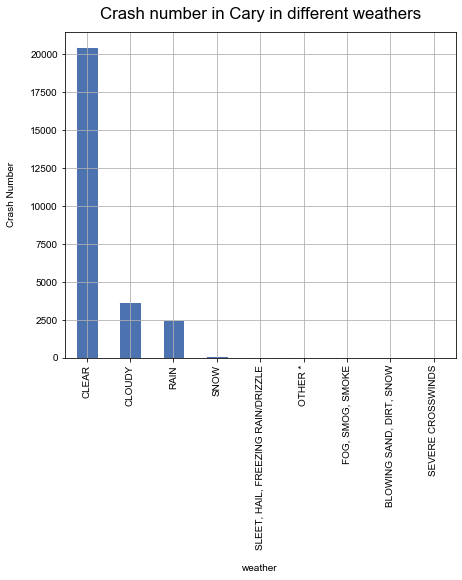

In [11]:
# Use Matplotlib and seaborn for drawing plot

df['weather'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['weather'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("weather", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary in different weathers", y=1.02);

plt.show()


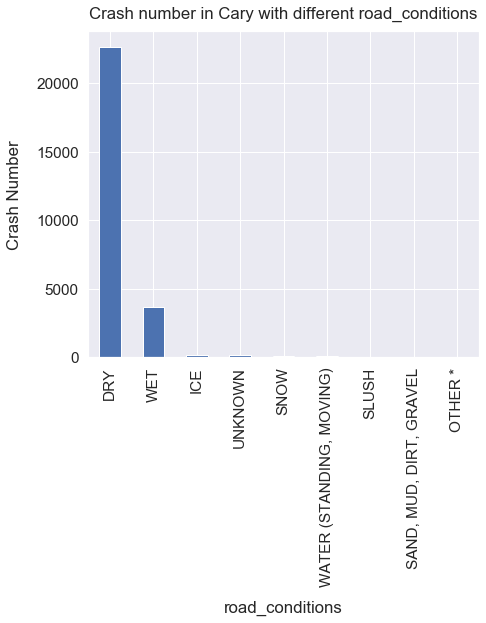

In [12]:
df['road_conditions'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_conditions'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_conditions", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_conditions", y=1.02);


plt.show()



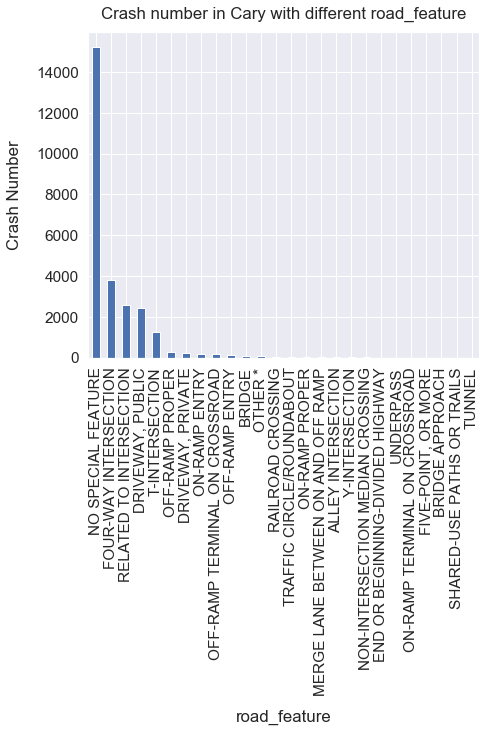

In [52]:
df['road_feature'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_feature'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_feature", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_feature", y=1.02);


plt.show()

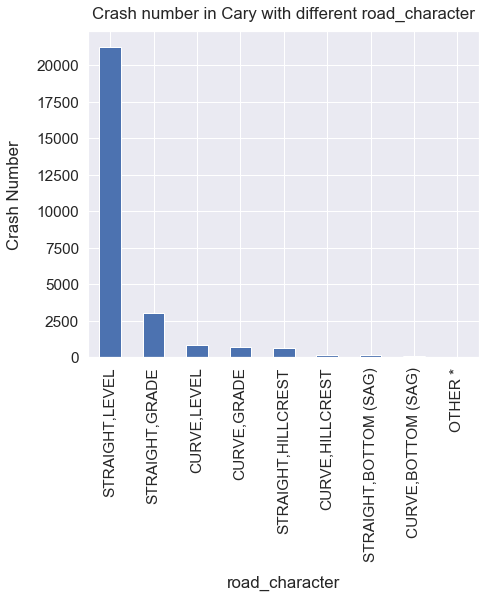

In [53]:
df['road_character'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_character'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_character", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_character", y=1.02);


plt.show()

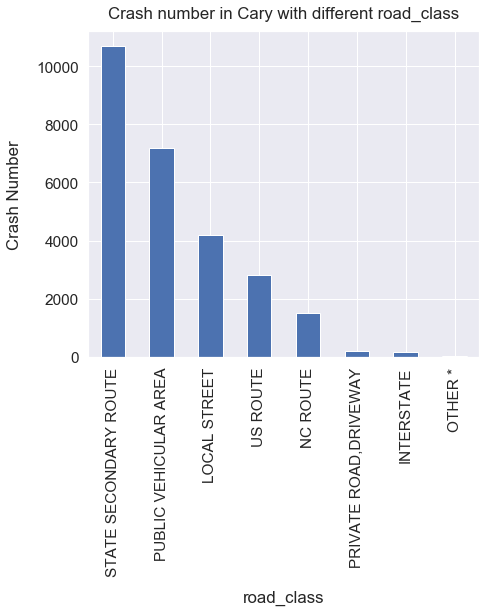

In [54]:
df['road_class'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_class", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_class", y=1.02);


plt.show()

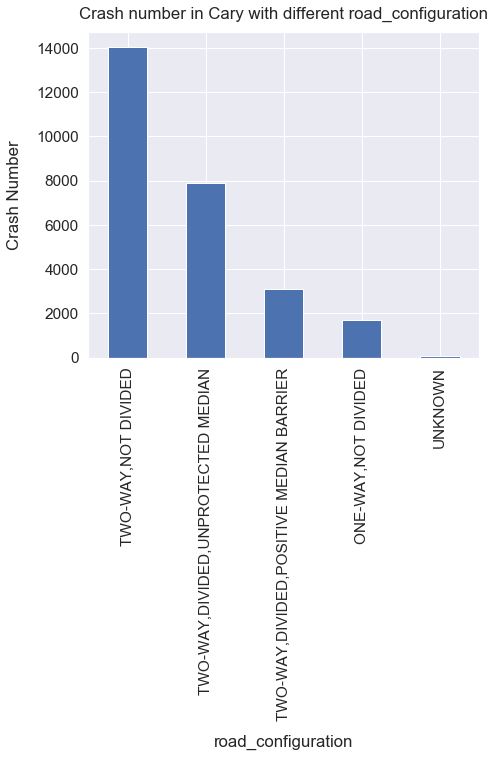

In [55]:
df['road_configuration'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_configuration'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_configuration", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_configuration", y=1.02);


plt.show()

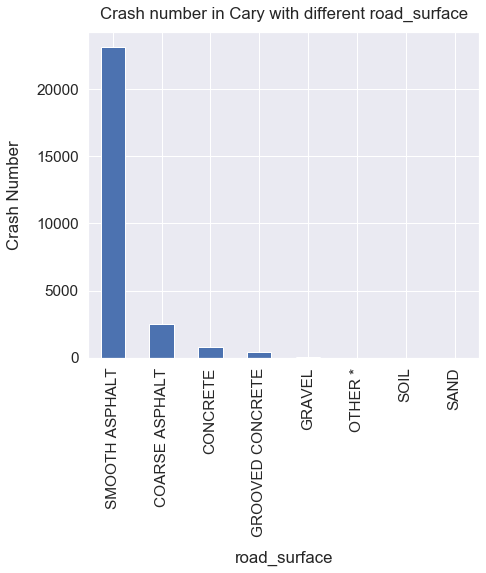

In [56]:
df['road_surface'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['road_surface'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("road_surface", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different road_surface", y=1.02);


plt.show()

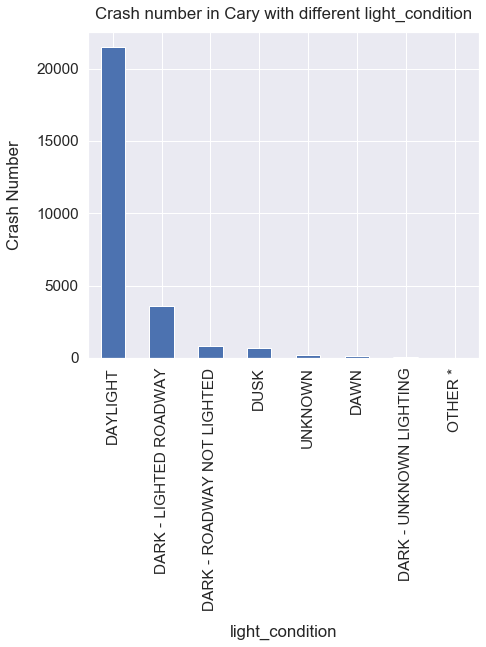

In [57]:
df['light_condition'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['light_condition'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("light_condition", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different light_condition", y=1.02);


plt.show()

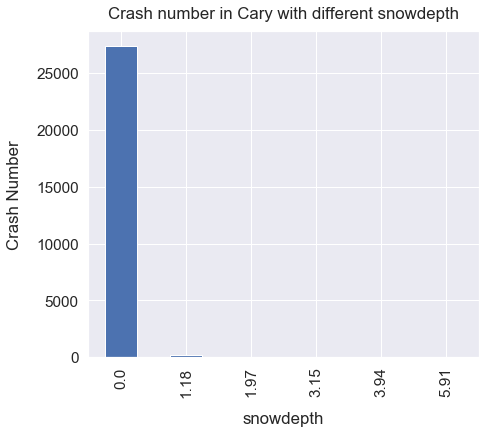

In [58]:
df['snowdepth'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['snowdepth'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("snowdepth", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different snowdepth", y=1.02);


plt.show()

In [62]:
# pandas value_counts with bins argument
precipitation_bin_df =df['precipitation'].value_counts(bins=5)
print(precipitation_bin_df)

(-0.00745, 1.29]    26877
(1.29, 2.58]          614
(2.58, 3.87]           73
(3.87, 5.16]           40
(5.16, 6.45]            9
Name: precipitation, dtype: int64


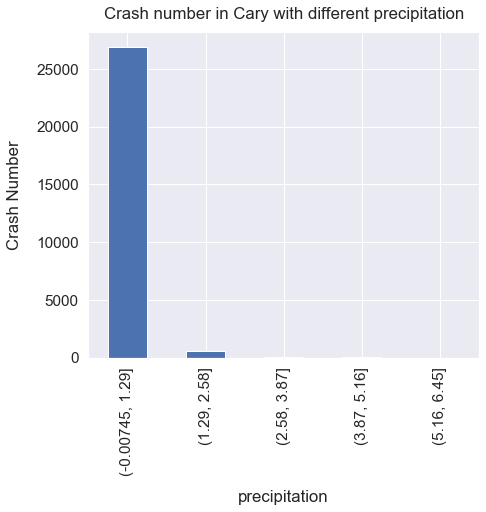

In [63]:
df['precipitation'].value_counts(bins=5).plot(kind='bar');

sns.set(font_scale=1.4)
df['precipitation'].value_counts(bins=5).plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("precipitation", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different precipitation", y=1.02);


plt.show()

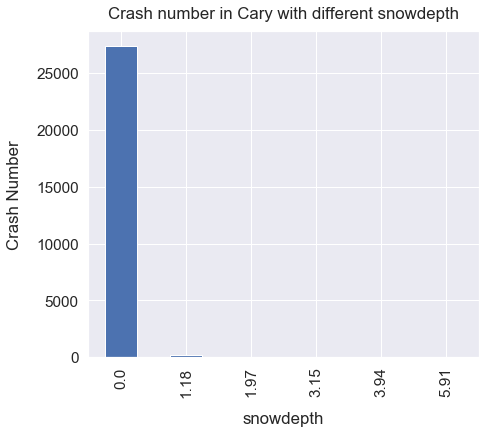

In [64]:
df['snowdepth'].value_counts().plot(kind='bar');

sns.set(font_scale=1.4)
df['snowdepth'].value_counts().plot(kind='bar', figsize=(7, 6), rot=90)
plt.xlabel("snowdepth", labelpad=14)
plt.ylabel("Crash Number", labelpad=14)
plt.title("Crash number in Cary with different snowdepth", y=1.02);


plt.show()